# WEEK-2

## I. Inversions

The number of inversions in a list of size n is, 
$$

\\ j = 0...n \ \ and \ \ i < j \\
\\ if \ \  l[j]<l[i] \ \ then \ \ inversions++

$$

In [ ]:
""" 
Take for example the list l = [4,3,2,1]
Implementing a brute force algorithm
"""

def count_inversions(l):
    inversions = 0
    inversions_pair = []
    for j in range(len(l)):
        for i in range(j):
            if l[j]<l[i]:
                inversions+=1
                inversions_pair.append((l[i],l[j]))

    print(f"""
    The number of inversions in the list {l} are {inversions}.
    Pairs for reference : {inversions_pair}
    """)

l = [4,3,2,1]
# l = [1,3,5,2,4,6]
count_inversions(l)


##### _Note : One way of calculating the inversions on paper is by writing down the order list first and then the unordered/given list below it and connecting the same numbers with each other using lines. The number of inversions would be as many as there are lines crossing each other._

Maximum number of inversiosn a array of length n can have is,
$ \\ \sum (n) \\$
if n = 4,
$ \\ \sum(4) = 6 \\$
Note : $ \sum(n) = \frac{n(n-1)}{2} $


### *Time complexity is*
$ O(\sum(n)) $


Note : Is there a better way to find this?
 Yes. Using divide and conqure

In [12]:
"""
    The merge sort algorithm does exactly this. As we can see below the joining part of this algorithm will exactly tell us where the inversion is occuring.
    Therefore implementing the same algorithm but this time with the added code to identify those inversions as well.
    Note : The number of split inversions can be counted as if y E B is copied before x E A, then the number of inversions involving y are as many as the 
    number of elements left in A greater than x(including x).

"""
inversions = []
def count_inversions_plus_merge(l):
    n = len(l)
    
    if n == 1:
        return l

    a = count_inversions_plus_merge(l[0:n//2])
    b = count_inversions_plus_merge(l[n//2:n])
    
    i = j = 0
    opt_lst = []

    while i < len(a) and j < len(b):
        if a[i] < b[j]:
            opt_lst.append(a[i])
            i+=1
        else:
            opt_lst.append(b[j])
            for split_inv in a[i:]:
                global inversions
                inversions.append((b[j],split_inv)) 
            j+=1
    if i < len(a):
        opt_lst.extend(a[i:])
    if j < len(b):
        opt_lst.extend(b[j:])
    
    return opt_lst
        

l = [4,3,2,1]
count_inversions_plus_merge(l)
print(f"""
    The inversions for the input {l} are,
    {inversions}
""")

    



    The inversions for the input [4, 3, 2, 1] are,
    [(3, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4)]



## Matrix Multiplication - Stressen's algorithm

In [22]:
"""
    Crude implementation of matrix multiplication
"""
class Matrix:
    """
        Class implementation of matrix
    """
    
    def __init__(self,row,col,values=None):
        self.row = row
        self.col = col
        self.values = values
        self.mat = []
        for _ in range(row):
            self.mat.append([0 for _ in range(col)])
        if self.values:
            if len(self.values) != self.row*self.col:
                raise ValueError("The values should match the size of the matrix")
            else:
                _ind = 0
                for i in range(self.row):
                    for j in range(self.col):
                        self.mat[i][j]=self.values[_ind]
                        _ind+=1
    
    def udpate_values(self,values):
        self.values = values
        if len(self.values) != self.m*self.m:
            raise ValueError("The values should match the size of the matrix")
        else:
            _ind = 0
            for i in range(self.row):
                for j in range(self.col):
                    self.mat[i][j]=values[_ind]
                    _ind+=1

    def __str__(self):
        return str(self.mat)
           


In [37]:
"""
    Logic implementation for matrix multiplication
"""
a = Matrix(2,2,[1,2,3,4])
# b = Matrix(2,3,[5,6,7,8,9,10])
b = Matrix(2,2,[1,2,3,4])

def mul_mat(a,b):
    cnt = 0
    if a.col != b.row:
        raise ValueError("The dimensions of the matrices are not suitable for multiplication")
    
    mat_a = a.mat
    mat_b = b.mat
    result= Matrix(a.row, b.col).mat
    for row in range(a.row):
        for col in range(b.col):
            sum = 0
            for ind in range(len(mat_a[row])):
                sum += (mat_a[row][ind]*mat_b[ind][col])
                cnt+=1
                # print(sum)
            result[row][col] = sum
    print(result)
    print("The time complexity is : ", cnt)

mul_mat(a,b)




[[7, 10], [15, 22]]
The time complexity is :  8


##### Time complexity is,
Assuming that the n is the size of the matrix(n = 2 if row=2 and col=2), then the time complexity is $O(n^3)$. 

### Coming to the strassenns algorithm. 

Asuming we divide a matrix into 4 parts each with $\large \frac{n}{2}$ size until a base case is met and then multiply and combine the result recursively, we will still end up with 8 multiplications. This will again lead us to $O(n^3)$ time complexity. Hence strassen came up with the idea to somehow only multipy 7 times and find the result of 8th multiplication through other results($O(1)$). Even though it might seem like saving 1 multiplication is not much for large n it makes significante difference.


###### Fun Fact : at the time(1969) it blew people's mind.

##### Details

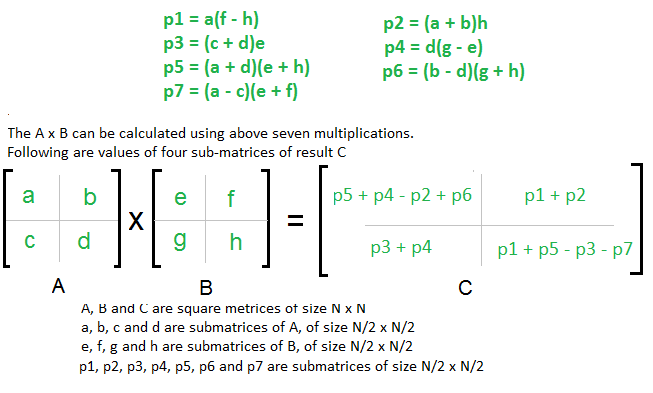


How did he come up with this still remains a mister

## Closest Pair problem


Given $n$ number of points in a 2-d plane, find the closest pair of points among all the pair of points. 

Note : Eucledian distance is used to calculate the points

##### How can we solve it using divide and conqure?


Assumptions : all the x-points and y-points are unique.

Brute force would give us $O(n^2)$ time complexity.


Understanding how we would do it in 1-d plane.
1. sort all the points t.c. :$O(nlogn)$ 
2. calculate the distance between adjacent pairs. This would give us $O(n)$ t.c.



**Goal : to solve the 2-d version in $(nlogn)$ time complexity**


Input to solve the problem


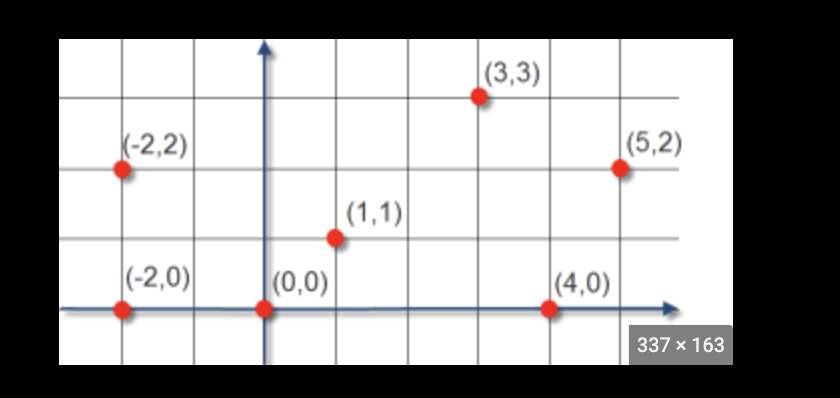

In [56]:
"""
    Self implementation of the closest split pair
"""

Px = [-2,-2,0,1,3,5,4,1]
Py = [ 2, 0,0,1,3,2,0,0]

tc = 0
def eucledian_distance(ax,ay,bx,by):
    global tc
    tc+=1
    return pow(pow((ax-bx),2) + pow((ay-by),2),0.5)

def closest_pair(Px,Py):

    # define the base case
    if len(Px) == 2 and len(Py) == 2:
        return Px,Py, eucledian_distance(Px[0],Py[0],Px[1],Py[1])
    
    else:
        Ax,Ay,Ad = closest_pair(Px[0:len(Px)//2],Py[0:len(Py)//2])
        Bx,By,Bd = closest_pair(Px[len(Px)//2:],Py[len(Py)//2:])
    
    if Ad<Bd:
        closestPair = (Ax,Ay)
        MINd = Ad
    else:
        closestPair = (Bx,By)
        MINd = Bd

    for Aind in range(len(Ax)):
        for Bind in range(len(Bx)):
            new_min_d = eucledian_distance(Ax[Aind],Ay[Aind],Bx[Bind],By[Bind])
            if new_min_d < MINd:
                MINd = new_min_d
                closestPair = ([Ax[Aind],Bx[Bind]],[Ay[Aind],By[Bind]])

    return closestPair[0],closestPair[1],MINd
print("T.C.:",tc)    
closest_pair(Px,Py)

"""
    So far this does not work as the comparisions I am doing are in halfs.
    The split comparision for the first half and second half(4 points split) are not compared with each other and the closest pairs are getting missed out.
"""


T.C.: 0


([0, 1], [0, 1], 1.4142135623730951)

Closest pair implementation

let $\delta$ = min distance between the closest pairs returned by our left half and right half

let $\bar{x}$ = biggest x-co-ordinate in left of Px 

let Sy = points of P with x-coordinate between $[\bar{x} - \delta, \bar{x} + \delta ]$, sorted by y-cordinate 

Initialize best = $\delta$ , closestPair = Null

for i = 1 to |Sy|-1 <br /> 
for j = 1 to min(|Sy|-i,7 ) <br />
let p,q = ith, i+jth point in Sy<br />
If d(p,q) < best<br />
bestPair = p,q<br />
best = d(p,q)<br />

## Master method

Details in book

But is says,

$if a= b^d$ <br />
$O(n) = n^d*log(n)$ ,   <br /><br />
$if a< b^d $<br />
$O(n) = n^d$ ,          <br /><br />
$if a> b^d $<br />
$O(n) = n^{log_{b}a}$ , <br />


## Quick Sort


1. Choose a pivot element
2. Partition such that all the elements left to the pivot are lesser than that and right to the pivot are greater than that


###### Note : it puts the pivot in its right position

How do we implement this partition subroutine?

The easy way out is, if we use an extra O(n) memory then we can simply create a new array, then based on a simple scan O(n) we can enter the value either to the left point or right point of the new array based on simple comparision.

But if we were to not use this extra memeory? then?

let the pivot be at the 0th position in the array and the rest of the array is divided as 2 parts(the values that we have scanend through and the values that we havent yet scanned through). Among the values that we have scanned through, the values less than the pivot should be before the values that are greater than the pivot. 

| p | <p | >p | ? |

assign 2 indexes(i and j) where j represents the boundry between seen and unseen array and i represents the boundry between smaller and bigger elements in the seen part of the array. At the end swap the pivot with ith position such that the pivot ends up at its right position.

Next recursively call the left part and right part of the pivot with the same function.


In [82]:
tc = 0
def quick_sort(arr):
    # base case
    if len(arr)<=1:
        return arr
    # other case
    pivot = arr[0]

    i = 0
    for j in range(1,len(arr)):
        global tc
        tc+=1
        if arr[j] < pivot:
            print(tc)
            temp = arr[i+1]
            arr[i+1] = arr[j]
            arr[j] = temp
            i+=1
    
    arr[0] = arr[i]
    arr[i] = pivot

    if len(arr)==2:
        return arr
        
    a1 = quick_sort(arr[0:i])
    a2 = quick_sort(arr[i+1:])

    return a1 + [pivot] + a2


arr = [1,2,3,4,5,6,7,8]

print(quick_sort(arr))
print("time_complexity : ", tc)

        


[1, 2, 3, 4, 5, 6, 7, 8]
time_complexity :  28


Time complexity :

As seen from the above example, if the input is already a sorted array and the pivot is chosen as the first element, then the running time comes out to be $\theta (n^2)$. This is not better at all. 

But the best case scenario happens, when we somehow choose the pivot to be median in each all, in that case the array will split 
in halves in each call and the running time comes out as $\theta (n log(n))$.

How do you pick the best the pivot then?

Random pivots : First example of randomized algorithms. 

### Quick sort using random pivot selection 

This will give us $O(nlog(n))$ on average. (proof in book)

In [21]:
from random import Random
rand = Random()
tc = 0

def quick_sort_random_pivot(arr):
    if len(arr) < 2:
        return arr

    l = len(arr)
    r = rand.randint(0,l-1)
    if r !=0:
        arr[0],arr[r] = arr[r],arr[0]
    
    pivot  = arr[0]

    border1 = 1
    border2 = 1

    for _ in range(1,len(arr)):
        if arr[border1] < pivot:
            global tc
            tc+=1
            arr[border1],arr[border2] = arr[border2],arr[border1]
            border2+=1
        border1+=1

    arr[0],arr[border2-1] = arr[border2-1],arr[0]

    quick_sort_random_pivot(arr[0:border2-1])
    quick_sort_random_pivot(arr[border2:])
    
    
    return arr

arr = [8,7,6,5,4,3,2,1]
output = quick_sort_random_pivot(arr)

# print(f"Sorted array : {arr}")
# print(f"number of comparision : {tc}")


# analysing the number of comparisions for over 100 iterations
num_of_comparision_iter = []
for _ in range(100):
    tc = 0
    output = quick_sort_random_pivot(arr)
    num_of_comparision_iter.append(tc)

print(f"O(nlogn) = {24}")
print(f"Number of comparisions in each iteration : \n {num_of_comparision_iter}")


O(nlogn) = 24
Number of comparisions in each iteration : 
 [5, 4, 9, 6, 9, 8, 7, 9, 10, 7, 6, 6, 10, 5, 10, 5, 6, 19, 11, 9, 8, 5, 14, 6, 8, 7, 11, 8, 9, 7, 10, 6, 5, 6, 15, 10, 5, 2, 16, 6, 13, 13, 6, 6, 14, 9, 9, 12, 16, 6, 5, 7, 12, 4, 6, 5, 6, 10, 7, 8, 7, 9, 8, 8, 7, 6, 11, 8, 14, 8, 5, 16, 9, 8, 7, 15, 3, 4, 9, 13, 6, 7, 12, 6, 6, 7, 14, 6, 6, 8, 6, 6, 12, 9, 6, 15, 8, 8, 10, 8]
